<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/Logo_uaem_morelos.png" style="width: 400px;"/>

<h2><center>Instituto de Investigación en Ciencias Básicas y Aplicadas (IICBA)</center></h2>
<h2><center>Centro de Investigación en Ciencias (CINC)</center></h2>

<h3><center>Curso: Inteligencia Artificial</center>
<center>Profesor: Mauricio Rosales Rivera</center>
<center>Mini Proyecto</center></h3>
    
<h3><center>Fecha: Diciembre 11, 2020</center></h3>

---

<h3>Calificación: </h3>

---
<table>
    <tr>
        <td>Nombre</td>
        <td>Programa Educativo</td>
        <td>Semestre</td>
        <td>Matrícula</td>
        <td>Enlace</td>
    </tr>
    <tr>
        <td>Edna Cruz Flores</td>
        <td>Maestría en Optimización y Cómputo Aplicado</td>
        <td>Tercer semestre</td>
        <td>10034119</td>
        <td><a href='https://github.com/Edna-Cruz-Fl/IA-UAEM/tree/main/Examen_Modulo3-4'>git</a></td>
    </tr>
    <tr>
        <td>Alejandro Carvantes Barrera</td>
        <td>Maestría en Optimización y Cómputo Aplicado</td>
        <td>Primer semestre</td>
        <td>10036987</td>
        <td><a href='https://github.com/ItsShinyAlex/IA_CarvantesBarreraAlejandro/blob/main/aima-python-master/ExamenParcial2/%5BEquipo4%5DExamen_Parcial_2.ipynb'>git</a></td>
    </tr>
    <tr>
        <td>Ollin Villalon Villarreal</td>
        <td>Licenciatura en Ciencias Computacionales</td>
        <td>Tercer semestre</td>
        <td>1......4</td>
        <td><a href='https://github.com/ollinillo/GAN/blob/main/%5Bgithub%5Dpix2pix.ipynb'>git</a></td>
    </tr>
</table>

## <font color="brown">Proyecto - Inteligencia Artificial</font>

---

Indicaciones: El proyecto seleccionado será desarrollado siguiendo ciertas condiciones. Deberán seguir la estructura recomendada (pero podrán cambiar títulos, es sólo una sugerencia) y podrán añadir secciones en caso de que ser necesario.

* La entrega límite de entrega de la notebook será: Viernes 11 de diciembre.
* Deberán realizar una exposición (entre 10 y 20 minutos a lo mucho), donde proporcionen una explicación acerca de la metodología implementada y los resultados obtenidos.

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.
En caso de no tener la información aquí solicitada, no se evaluará el proyecto.

<a id="general"></a>
### Contenido

-----

1. [Objetivo](#a)

2. [Exploración de Datos](#b)
    * Detección de valores faltantes
    * Agregando valores
    * Visualizando datos
    * Preprocesamiento de datos
        * Reducción de dimensiones
        
-----
3. [Selección de modelos](#c)
    * Aprendizaje No Supervisado / Supervisado
        * Selección de modelo
        * Selección de hiperparámetros
        * Entrenamiento
        * Prueba
        * Resultados
-----

4. [Conclusiones](#d)

-----


5. <a href="#e">Implementación de Pix2Pix</a>

-----

<a id="a"></a>
### 1. Objetivo

---
[Regresar a contenido](#general)

Los pronósticos de series de tiempo son métodos que son ampliamente explorados en el área de inteligencia artificial tanto en aprendizaje máquina como en aprendizaje profundo con aplicaciones hacia predicciones de acciones, predicción de pronósticos meteorológicos, planificación empresarial, aignación de resucros, entre otras.

En el presente proyecto se documenta la implementación de un modelo de Long Short-Term Memory, que es una variante de las Redes Neuronales Recurrentes aplicado a la predicción del valor de las bitcoins, que es una de las crisptomonedas más conocidas y utilizadas en la actualidad.

**Pronóstico de series de tiempo**

Las series de tiempo son series de puntos de datos ordenados en el tiempo. Estos tipos de datos suelen modelarse como un proceso estocástico *Y(t)*, es decir, como una secuencia de variables aleatorias.

En un entorno de predicción, nos encontramos en el momento *t* y queremos predecir o estimar *Y(t + h)*, utilizando la información actual *t* en una serie de tiempo dada.







<a id="b"></a>
### 2. Exploración de Datos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación del conjunto de datos a utilizar. Así como tener un orden al momento de importar librerías, mostrar gráficos del EDA y preprocesamiento de los datos.

Bitcoin es una de las crisptomonedas más conocidas, confiables y utilizadas actualmente. Fue lanzada en el año 2009 por Satoshi Nakamoto como código abierto. El conjunto de datos utilizado en el presente proyecto es *bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv* de 4572257 filas × 8 columnas. **Contiene el mercado histórico de bitcoins en un periodo de tiempo de enero de 2012 a septiembre de 2020 con las actualizaciones minuto a minuto de los siguientes valores:**

*   Apertura
*   Máximo
*   Mínimo
*   Cierre

Nota: las marcas de tiempo sin transacciones o actividad tienen sus campos de datos con NaN.

### 1.1. Preparación de los datos

In [ ]:
import numpy as np 
import pandas as pd 
# import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# data visualization
import bokeh.plotting as bpl
import bokeh.models as bmd
import bokeh.layouts as bly
import bokeh.transform as btr
import bokeh.palettes as bpa
from bokeh.models import DatetimeTickFormatter

# Model
np.random.seed(4)
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l1_l2,l2,l1
from sklearn.metrics import mean_absolute_error
from PIL import Image
from keras.utils.vis_utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Timestamp:** Fecha.

**Volume**: Bitcoins vendidas en cantidad (BTC) y en valor (Currency).

**Weighted_Price**: Valor de la bitcoin. 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv')
df

Timestamp      Open  ...  Volume_(Currency)  Weighted_Price
0        1325317920      4.39  ...           2.000000        4.390000
1        1325317980       NaN  ...                NaN             NaN
2        1325318040       NaN  ...                NaN             NaN
3        1325318100       NaN  ...                NaN             NaN
4        1325318160       NaN  ...                NaN             NaN
...             ...       ...  ...                ...             ...
4572252  1600041360  10324.35  ...         837.754188    10324.419779
4572253  1600041420  10331.41  ...        5918.028741    10331.444396
4572254  1600041480  10327.20  ...       25711.238323    10326.175283
4572255  1600041540  10330.02  ...       47253.747619    10333.972651
4572256  1600041600  10338.82  ...       13349.565122    10332.429402

[4572257 rows x 8 columns]

Formateo de la columna Timestamp y se crea una nueva columna con las fechas denomidada 'Date'

In [ ]:
df['Date']=pd.to_datetime(df['Timestamp'],unit='s').dt.date
df.head()

Timestamp  Open  High  ...  Volume_(Currency)  Weighted_Price        Date
0  1325317920  4.39  4.39  ...                2.0            4.39  2011-12-31
1  1325317980   NaN   NaN  ...                NaN             NaN  2011-12-31
2  1325318040   NaN   NaN  ...                NaN             NaN  2011-12-31
3  1325318100   NaN   NaN  ...                NaN             NaN  2011-12-31
4  1325318160   NaN   NaN  ...                NaN             NaN  2011-12-31

[5 rows x 9 columns]

In [ ]:
df.Date = pd.to_datetime(df.Date)
df.dtypes

Timestamp                     int64
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
Date                 datetime64[ns]
dtype: object

Se puede observar que el conjunto de datos contiene celdas sin datos definidos con un NaN, como se mencionó en la descripción de los datos, esta notación se estableció para los periodos de tiempo donde no hubo cambios en los valores. A continuación se eliminan estos datos faltantes.

In [ ]:
dataBC = df.dropna()
print('Dimensiones del conjunto de datos tras la eliminacion de los valores faltantes:\n',dataBC.shape)
print(dataBC.head(20))

Dimensiones del conjunto de datos tras la eliminacion de los valores faltantes:
 (3330541, 9)
       Timestamp  Open  High  ...  Volume_(Currency)  Weighted_Price       Date
0     1325317920  4.39  4.39  ...           2.000000        4.390000 2011-12-31
478   1325346600  4.39  4.39  ...         210.720000        4.390000 2011-12-31
547   1325350740  4.50  4.57  ...         171.380338        4.526411 2011-12-31
548   1325350800  4.58  4.58  ...          41.220000        4.580000 2011-12-31
1224  1325391360  4.58  4.58  ...           6.879160        4.580000 2012-01-01
1896  1325431680  4.84  4.84  ...          48.400000        4.840000 2012-01-01
2333  1325457900  5.00  5.00  ...          50.500000        5.000000 2012-01-01
3612  1325534640  5.00  5.00  ...          95.240000        5.000000 2012-01-02
4553  1325591100  5.32  5.32  ...          12.870000        5.320000 2012-01-03
4710  1325600520  5.14  5.14  ...           3.495200        5.140000 2012-01-03
4742  1325602440  5.26  5.

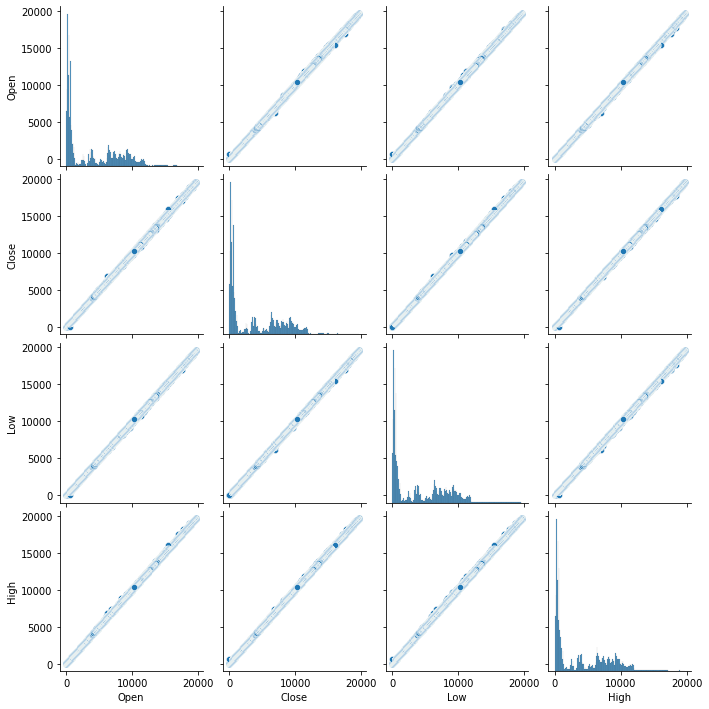

In [ ]:
sns.pairplot(dataBC[["Open", "Close", "Low", "High"]])

In [ ]:
dataBC['Close'] = dataBC['Close'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataBC['Open'] = dataBC['Open'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataBC

Timestamp   Open  ...  Weighted_Price       Date
0        1325317920      4  ...        4.390000 2011-12-31
478      1325346600      4  ...        4.390000 2011-12-31
547      1325350740      4  ...        4.526411 2011-12-31
548      1325350800      4  ...        4.580000 2011-12-31
1224     1325391360      4  ...        4.580000 2012-01-01
...             ...    ...  ...             ...        ...
4572252  1600041360  10324  ...    10324.419779 2020-09-13
4572253  1600041420  10331  ...    10331.444396 2020-09-13
4572254  1600041480  10327  ...    10326.175283 2020-09-13
4572255  1600041540  10330  ...    10333.972651 2020-09-13
4572256  1600041600  10338  ...    10332.429402 2020-09-14

[3330541 rows x 9 columns]

Visualización de la distribución de la variable de Valor de Cierre (Close) de bitcoins en el periodo de tiempo.

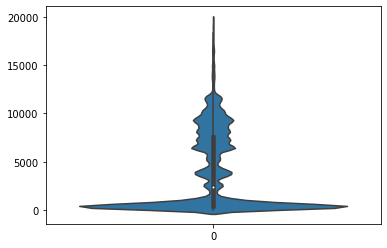

In [ ]:
sns.violinplot(data=dataBC['Close'],inner='box')

La variable del valor de cierre indica el último valor para las bitcoins, por lo tanto se seleccionó la variable para realizar el pronóstico del valor final. Para una mejor visualización del comportamiento de la variable se representó en una serie de tiempo.

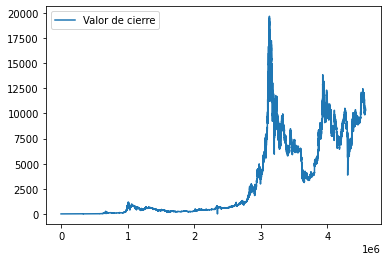

In [ ]:
dataBC['Close'].plot(legend=True)
plt.legend(['Valor de cierre'])
plt.show()

<a id="c"></a>
### 3. Selección de modelos

---
[Regresar a contenido](#general)

**Long Short-Term Memory (LSTM)**

El algoritmo Long Short-Term Memory LSTM es fundamental dentro del área de aprendizaje profundo (deep learning) y práctico para su aplicación en series de tiempo, fue desarrollado en 1997 por Hochreiter y Schmidhuber y recientemente ha ido 
evolucionando.

En la columna creada que contiene la fecha (Date) en su formato correspondiente se puede observar que existen varias fechas repetidas, ya que la actualización se puede presentar a diferentes horas, pero es importante eliminar la redundancia de la fecha de los valores de los bitcoins con el siguiente procedimiento:


In [ ]:
newdata = dataBC.groupby('Date')
newdata.head()

Timestamp      Open  ...  Weighted_Price       Date
0        1325317920      4.39  ...        4.390000 2011-12-31
478      1325346600      4.39  ...        4.390000 2011-12-31
547      1325350740      4.50  ...        4.526411 2011-12-31
548      1325350800      4.58  ...        4.580000 2011-12-31
1224     1325391360      4.58  ...        4.580000 2012-01-01
...             ...       ...  ...             ...        ...
4570817  1599955260  10441.23  ...    10439.932282 2020-09-13
4570818  1599955320  10437.36  ...    10438.064372 2020-09-13
4570819  1599955380  10435.90  ...    10435.900000 2020-09-13
4570820  1599955440  10432.10  ...    10434.121776 2020-09-13
4572256  1600041600  10338.82  ...    10332.429402 2020-09-14

[15860 rows x 9 columns]

In [ ]:
dataset = newdata['Close'].mean()
dataset.head()

Date
2011-12-31    4.482500
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.223333
Name: Close, dtype: float64

División del conjunto de datos para el entrenamiento y para prueba. Como se esta trabajando con  ua serie de tiempo, el conjunto de prueba no puede ser tan grande, para ello se eligió los 50 últimos valores de bitcoin de cierre.

In [ ]:
x_train=dataset.iloc[:3128]
x_test=dataset.iloc[3128:]
print('Dimensión del conjunto de entrenamiento:\n', x_train.shape)
print('Dimensión del conjunto de prueba:\n', x_test.shape)

Dimensión del conjunto de entrenamiento:
 (3128,)
Dimensión del conjunto de prueba:
 (50,)


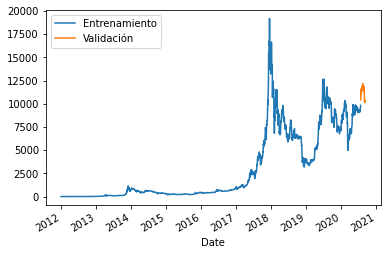

In [ ]:
x_train.plot(legend=True)
x_test.plot(legend=True)
plt.legend(['Entrenamiento', 'Validación'])
plt.show()

Aplicación de escalamiento y normalización de los valores para el conjunto de entrenamiento en un rango de 0 a 1.

In [ ]:
x_train=np.array(x_train)
x_train=x_train.reshape(x_train.shape[0],1)
print('Dimensión del conjunto de entrenamiento:\n', x_train.shape)

Dimensión del conjunto de entrenamiento:
 (3128, 1)


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
x_train_escalado = sc.fit_transform(x_train)


print('Dimensiones de conjunto de entrenamiento escalado: ', x_train_escalado.shape)

Dimensiones de conjunto de entrenamiento escalado:  (3128, 1)


A continuación, se complementa los vectores x_train y y_train que serán utilizados en el entrenamiento

In [ ]:
time_step=50
x_train=[]
y_train=[]
end = x_train_escalado.shape[0]

for i in range(timestep,end):
    x_train.append(x_train_escalado[i-time_step:i,0])
    y_train.append(x_train_escalado[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
print("Dimensiones de matriz x_train: ",x_train.shape)
print("\nDimensiones de vector de objetivos y_train: ",y_train.shape)

Dimensiones de matriz x_train:  (3078, 50, 1)

Dimensiones de vector de objetivos y_train:  (3078,)


In [ ]:
#Parámetros de la red LSTM
na = 50
u_ocultas = 32
dim_output = 1
n_epochs = 80
s_batch = 32

In [ ]:
modelo=Sequential()
# Capa LSTM con
modelo.add(LSTM(na,input_shape=(None,1),activation="relu"))
# Capa dropout como método de normalización con 10%
modelo.add(Dropout(0.05))
# Capa totalmente conectada con 50 neuronas
#modelo.add(Dense(units = u_ocultas, activation = 'relu'))
# Capa de salida con una sola neurona
modelo.add(Dense(dim_output))


# Compilación del modelo
modelo.compile(loss="mse",optimizer="adam")
print(modelo.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None


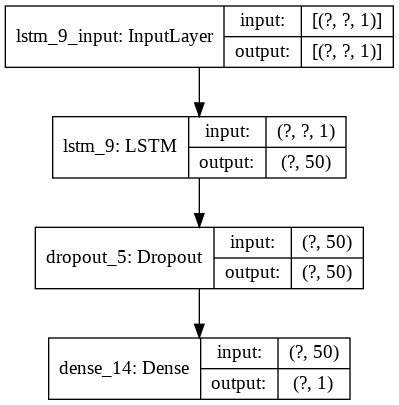

In [ ]:
plot_model(modelo, to_file='bitcoin_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('bitcoin_model.png'))

In [ ]:
modelo.fit(x_train,y_train,epochs=n_epochs,batch_size=s_batch)

Epoch 1/80
97/97 [==============================] - 10s 106ms/step - loss: 0.0053
Epoch 2/80
97/97 [==============================] - 10s 105ms/step - loss: 7.2682e-04
Epoch 3/80
97/97 [==============================] - 10s 108ms/step - loss: 6.3993e-04
Epoch 4/80
97/97 [==============================] - 10s 108ms/step - loss: 5.9491e-04
Epoch 5/80
97/97 [==============================] - 10s 106ms/step - loss: 6.1004e-04
Epoch 6/80
97/97 [==============================] - 10s 107ms/step - loss: 5.9397e-04
Epoch 7/80
97/97 [==============================] - 10s 107ms/step - loss: 5.3806e-04
Epoch 8/80
97/97 [==============================] - 10s 105ms/step - loss: 5.2219e-04
Epoch 9/80
97/97 [==============================] - 11s 112ms/step - loss: 5.2638e-04
Epoch 10/80
97/97 [==============================] - 10s 106ms/step - loss: 5.0709e-04
Epoch 11/80
97/97 [==============================] - 11s 110ms/step - loss: 4.5990e-04
Epoch 12/80
97/97 [==============================] - 11s

Extracción y normalización en un rango de -1 a 1 de los 50 valores para el conjunto de prueba

In [ ]:
test =dataset[len(dataset)-len(x_test)-time_step:]
test = test.values.reshape(-1,1)
test = sc.transform(test)

In [ ]:
Xtest=[]
fin = test.shape[0]

for i in range(time_step,fin):
    Xtest.append(test[i-time_step:i,0])
Xtest=np.array(Xtest)
Xtest=Xtest.reshape(Xtest.shape[0],Xtest.shape[1],1)

Finalmente se realiza la comparación de lo predicho por el modelo y los valores reales del conjunto de datos de prueba.

In [ ]:
predicciones = modelo.predict(Xtest)
predicciones = sc.inverse_transform(predicciones)

data_real = np.array(x_test)
data_real = data_real.reshape(len(data_real),1)

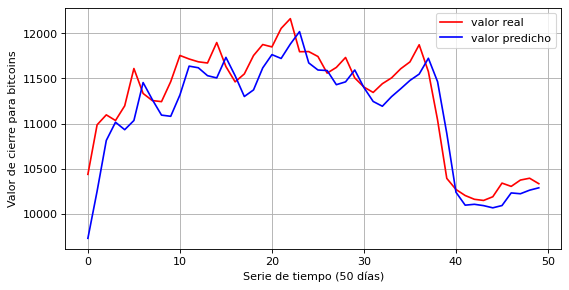

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_real,color="r",label="valor real")
plt.plot(predicciones,color="b",label="valor predicho")
plt.legend()
plt.xlabel("Serie de tiempo (50 días)")
plt.ylabel("Valor de cierre para bitcoins")
plt.grid(True)
plt.show()

<a id="d"></a>
### 4. Conclusiones

---
[Regresar a contenido](#general)

De su análisis, qué pueden concluir? Qué posibilidades extras pudieran aplicarse o con qué finalidad realizaron el trabajo.

El preprocesamiento de datos es esencial para poder aplicar un modelo correctamente, este puede representar dos tipos de errores comunes, uno contextual y otro de ejecución. El primero es el más peligroso y es donde más ingenio se debe usar ya que un modelo puede funcionar si conviertes tus tipos de datos y le das el formato necesario, pero no te arrojará un resultado real en el contexto deseado, por lo cual es importante entender tu conjunto de datos y pre-procesarlo a partir de un objetivo específico. 

Se obtuvo un gran resultado al probar las LSTM con distintos parámetros, esto se debe a que este tipo especial de red neuronal es ideal para trabajar series de tiempo ya que son insensibles a la longitud del espacio, en otra forma de decirlo, estas redes neuronales recuerdan la información previa de toda la serie de tiempo. Esto lo hace un gran modelo de elección.

Algo que se le pudo agregar a este análisis podría ser algún método distinto para la búsqueda de parámetros para después compararlos entre sí y así optimizar la solución. Además, se podría igual preprocesar la información distinto de modo que podamos tomar en cuenta los renglones con NAN's consecutivos, ya que incluso cuando no pase nada, es ausencia de actividad puede tener un significado. 

<div id="e"></div>

##5. Implementación de pix2pix

https://phillipi.github.io/pix2pix/

https://www.tensorflow.org/tutorials/generative/pix2pix

https://arxiv.org/abs/1611.07004


La **implementación de tensorflow de Pix2Pix** aprende un mapeo de imágenes de entrada a imágenes de salida.  

Cabe destacar que **Pix2Pix** está en sus etapas incipientes y se basa en tecnología que aún necesita pulirse, por lo mismo no es tan popular pero por eso mismo a continuación se mostrará una de sus posibles aplicaciones para observar su potencial. 

**NOTA:** Pix2Pix por si mismo es una aplicación de IA, pero en este trabajo se usará Tensorflow para hacer una fiel implementación del trabajo original. 


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Dataset:

https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html

In [ ]:
# Ruta raiz
PATH = "."

# Ruta entrada
INPATH = PATH + "/BluredFlowers"

# Ruta salida
OUPATH = PATH + "/targetFlowers"

# Ruta checkpoints
CKPATH = PATH + "/checkpoints_copy"

imgurls = !ls -1 "{INPATH}"

# número de imagenes a usar, (el total de imagenes son más de 8 mil)
n = 100
train_n = round(n * .8)

# Lista random
randurls = np.copy(imgurls)

# np.random.seed(23)
np.random.shuffle(randurls)

# Particion train/test
tr_urls = randurls[:train_n]
ts_urls = randurls[train_n:n]

print(len(imgurls),len(tr_urls),len(ts_urls))

# imgurls

8189 80 20


In [ ]:
IMG_WIDTH = 256
IMG_HEIGHT = 256

# Reescalar imágenes
def resize(inimg, tgimg, h, w):
    inimg = tf.image.resize(inimg, [h, w])
    tgimg = tf.image.resize(tgimg, [h, w])
    
    return inimg, tgimg

# Normalizar imagen a [-1, 1]
def normalize(inimg, tgimg):
    inimg = (inimg / 127.5) -1
    tgimg = (tgimg / 127.5) -1
    
    return inimg, tgimg

# Aumentación de datos: Random Crop + Flip
def random_jitter(inimg, tgimg):
    inimg, tgimg = resize(inimg, tgimg, 300, 300)
    
    stacked_image = tf.stack([inimg, tgimg], axis=0)
    cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_WIDTH, IMG_HEIGHT, 3])
    
    inimg, tgimg = cropped_image[0], cropped_image[1]
    
    if tf.random.uniform(()) > 0.5:
        
        inimg = tf.image.flip_left_right(inimg)
        tgimg = tf.image.flip_left_right(tgimg)
        
    return inimg, tgimg

def load_image(filename, augment=True):
    inimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(INPATH+"/"+filename)), tf.float32)[..., :3]
    tgimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(OUPATH+"/"+filename)), tf.float32)[..., :3]
    
    inimg, tgimg = resize(inimg, tgimg, IMG_HEIGHT, IMG_WIDTH)
    
    if augment:
        inimg, tgimg = random_jitter(inimg, tgimg)
        
    inimg, tgimg = normalize(inimg, tgimg)
    
    return inimg, tgimg

def load_train_image(filename):
    return load_image(filename, True)

def load_test_image(filename):
    return load_image(filename, False)

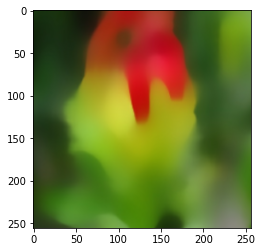

In [ ]:
# plt.imshow(load_train_image(randurls[0])[0])

plt.imshow((load_train_image(randurls[0])[0] + 1) /2)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(tr_urls)
train_dataset = train_dataset.map(load_train_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.batch(1)

test_dataset = tf.data.Dataset.from_tensor_slices(ts_urls)
test_dataset = test_dataset.map(load_test_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(1)

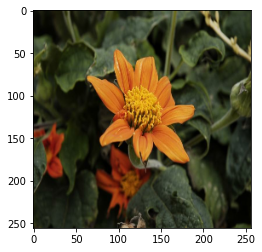

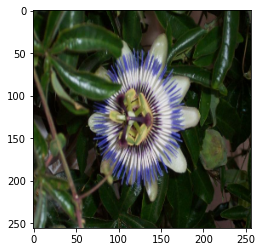

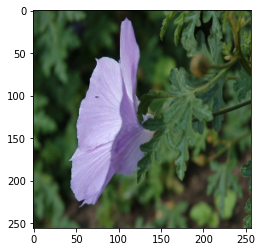

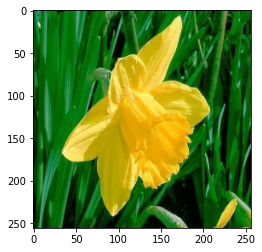

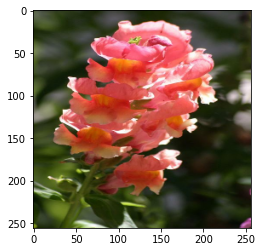

In [ ]:
for inimg, tgimg in test_dataset.take(5):
    plt.imshow(((tgimg[0, ...]) + 1) /2)
    plt.show()

In [ ]:
from tensorflow.keras.layers import *

def downsample(filters, apply_batchnorm=True):
    
    result = tf.keras.Sequential()
    
    initializer = tf.random_normal_initializer(0, 0.02)

    # Capa convolucional
    result.add(Conv2D(filters,
                      kernel_size = 4,
                      strides=2,
                      padding="same",
                      kernel_initializer=initializer,
                      use_bias= not apply_batchnorm))
    if apply_batchnorm:
        # Capa de BatchNorm
        result.add(BatchNormalization())
    
    # Capa de activación
    result.add(LeakyReLU())
    
    return result

In [ ]:

def upsample(filters, apply_dropout=False):
    
    result = tf.keras.Sequential()
    
    initializer = tf.random_normal_initializer(0, 0.02)

    # Capa convolucional
    result.add(Conv2DTranspose(filters,
                               kernel_size = 4,
                               strides=2,
                               padding="same",
                               kernel_initializer=initializer,
                               use_bias= False))
    
    # Capa de BatchNorm
    result.add(BatchNormalization())
    
    if apply_dropout:
        # Capa de Dropout
        result.add(Dropout(0.5))
            
    # Capa de activación
    result.add(ReLU())
    
    return result

# La siguiente arquitectura es U-Net, y se puede reutilizar  para otros problemas, como segmentación
https://en.wikipedia.org/wiki/U-Net

<!-- ![img](https://meetshah1995.github.io/images/blog/ss/segnet.png) -->
![img](segnet.png)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


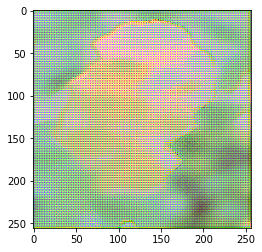

In [ ]:
def Generator():
    
    inputs = tf.keras.Input(shape=[None, None, 3])
    
    down_stack = [
        downsample(64, apply_batchnorm=False),  # (bs, 128, 128, 64)
        downsample(128),                        # (bs, 64,  64,  128)
        downsample(256),                        # (bs, 32,  32,  256)
        downsample(512),                        # (bs, 16,  16,  512)
        downsample(512),                        # (bs, 8,   8,   512)
        downsample(512),                        # (bs, 4,   4,   512)
        downsample(512),                        # (bs, 2,   2,   512)
        downsample(512),                        # (bs, 1,   1,   512)
    ]
    
    up_stack = [
        upsample(512, apply_dropout=True),      # (bs, 2,   2,   1024)
        upsample(512, apply_dropout=True),      # (bs, 4,   4,   1024)
        upsample(512, apply_dropout=True),      # (bs, 8,   8,   1024)
        upsample(512),                          # (bs, 16,  16,  1024)
        upsample(256),                          # (bs, 32,  32,  512)
        upsample(128),                          # (bs, 64,  64,  256)
        upsample(64),                           # (bs, 128, 128, 128)
    ]
    
    initializer = tf.random_normal_initializer(0, 0.02)
    
    last = Conv2DTranspose(filters = 3,
                           kernel_size = 4,
                           strides=2,
                           padding="same",
                           kernel_initializer=initializer,
                           activation="tanh")
    
    # conectamos las capas, iniciando por la imágen (capa inputs)
    x = inputs
    
    # las skip conections entre el encoder y el decoder
    s = []
    
    concat = Concatenate()
    
    for down in down_stack:
        # conectamos la capa anterior con la siguiente
        x = down(x)
        # guardamos la capa en el arreglo s para después hacer las skip conections
        s.append(x)

    # las skip conections van en orden contrario en el decoder, y descartamos la última capa (la fila de 1's)
    s = reversed(s[:-1])
    
    
    for up, skip in zip(up_stack, s):
        # seguimos conectando las capas, ahora con las del decoder
        x = up(x)
        # hacemos las skip conections entre las capas guardadas del encoder, con las capas del decoder
        x = concat([x, skip])
    
    last = last(x)
    
    return tf.keras.Model(inputs=inputs, outputs=last)

generador = Generator()

gen_output = generador(((inimg+1)*255), training=False)
plt.imshow(gen_output[0, ...])

# Ahora a implementar el discriminador PatchGAN

un discriminador normal tiene como salida un valor fake o real
pero el PatchGAN tiene como salida una imágen con secciones que son probablemente falsas o reales

![img](The-PatchGAN-structure-in-the-discriminator-architecture.ppm)

![img](patchgan.png)

https://medium.com/@sahiltinky94/understanding-patchgan-9f3c8380c207

In [ ]:
def Discriminator():
    # Este disccriminador está condicionado a la imagen de entrada
    ini = Input(shape=[None, None, 3], name="input_img")
    gen = Input(shape=[None, None, 3], name="gener_img")
    
    # apilamos las imagenes
    con = concatenate([ini, gen])
    
    initializer = tf.random_normal_initializer(0, 0.02)
    
    down1 = downsample(64, apply_batchnorm=False)(con)
    down2 = downsample(128)(down1)
    down3 = downsample(256)(down2)
    down4 = downsample(512)(down3)
    
    last = Conv2DTranspose(filters = 1,
                           kernel_size = 4,
                           strides=1,
                           padding="same",
                           kernel_initializer=initializer)(down4)
    
    return tf.keras.Model(inputs=[ini, gen], outputs=last)

TensorShape([1, 16, 16, 1])

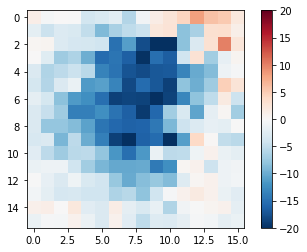

In [ ]:
discriminador = Discriminator()

disc_out = discriminador([((inimg+1)*255), gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap="RdBu_r")
plt.colorbar()
disc_out.shape

# Ahora a definir la función de coste adversaria

In [ ]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(disc_real_output, disc_generated_output):
    # Diferencia entre los True por ser real y el detectado por el discriminador
    real_loss = loss_obj(tf.ones_like(disc_real_output), disc_real_output)
    
    # Diferencia entre los False por ser generado y el detectado por el discriminador
    generated_loss = loss_obj(tf.zeros_like(disc_generated_output), disc_generated_output)
    
    total_disc_loss = real_loss + generated_loss
    
    return total_disc_loss

In [ ]:
LAMBDA = 100

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_obj(tf.ones_like(disc_generated_output), disc_generated_output)
    
    # mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    
    total_gen_loss = gan_loss + (LAMBDA * l1_loss)
    
    return total_gen_loss

In [ ]:
import os

generator_optimizer     = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_prefix = os.path.join(CKPATH, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generador,
                                 discriminator=discriminador)

# para restaurar un checkpoint:
checkpoint.restore(tf.train.latest_checkpoint(CKPATH))#.assert_consumed()

In [ ]:
def generate_images(model, test_input, tar, save_filename=False, display_imgs=True):
    prediction = model(test_input, training=True)
    
    if save_filename:
        tf.keras.preprocessing.image.save_img(PATH+"/output/"+save_filename + ".jpg",prediction[0, ...])
        
    plt.figure(figsize=(10,10))
    
    display_list = [test_input[0], tar[0], prediction[0]]
    title = ["Input Image", "Ground Truth", "Predicted Image"]
    
    if display_imgs:
        for i in range(3):
            plt.subplot(1, 3, i+1)
            plt.title(title[i])
            
            #getting the pixel values between [0, 1] to plot it
            plt.imshow(display_list[i] * 0.5 + 0.5)
            plt.axis("off")
            
    plt.show()

In [ ]:
@tf.function()
def train_step(input_image, target):
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as discr_tape:
    
        output_image = generador(input_image, training=True)

        output_gen_discr = discriminador([output_image, input_image], training=True)

        output_trg_discr = discriminador([target, input_image], training=True)

        discr_loss =  discriminator_loss(output_trg_discr, output_gen_discr)

        gen_loss = generator_loss(output_gen_discr, output_image, target)
    
        generator_grads = gen_tape.gradient(gen_loss, generador.trainable_variables)
        
        discriminator_grads = discr_tape.gradient(discr_loss, discriminador.trainable_variables)
        
        generator_optimizer.apply_gradients(zip(generator_grads, generador.trainable_variables))
        
        discriminator_optimizer.apply_gradients(zip(discriminator_grads, discriminador.trainable_variables))

In [ ]:
from IPython.display import clear_output

def train(dataset, epochs):
    for epoch in range(epochs):
        
        imgi = 0
        for input_image, target in dataset:
            print("epoch " + str(epoch) + " - train: " + str(imgi) + "/" + str(len(tr_urls)))
            imgi+=1
            train_step(input_image, target)
            clear_output(wait=True)
        
        imgi = 0
        for inp, tar in test_dataset.take(5):
            generate_images(generador, inp, tar, save_filename=str(imgi) + "_" + str(epoch), display_imgs=True )
            imgi+=1
            
        # saving (checkpoint) the model every 20 epochs
        if (epoch +1) % 20 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

In [ ]:
#para entrenar:
# train(train_dataset, 100)

In [ ]:
# para restaurar un checkpoint:
# checkpoint.restore(tf.train.latest_checkpoint(CKPATH))#.assert_consumed()

In [ ]:
# Para guardar los modelos:
# generador.save("generator_epoch50_h5.model", save_format="h5")
# discriminador.save("discriminator_epoch50_h5.model", save_format="h5")

# Para cargar los modelos:
# generador.load_model("generator_epoch50_h5.model")
# discriminador.load_model("discriminator_epoch50_h5.model")

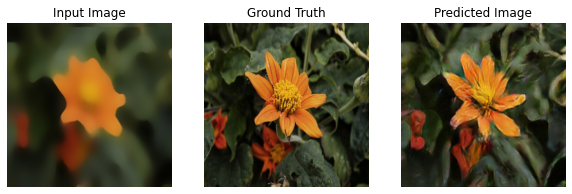

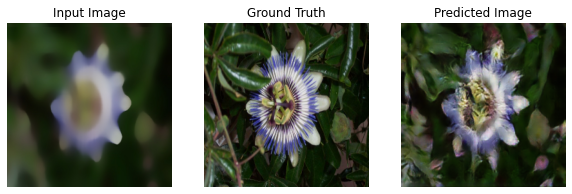

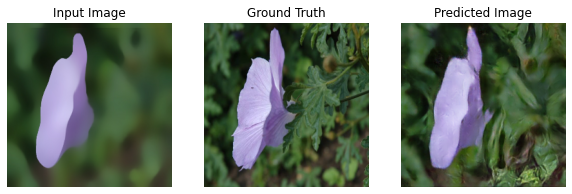

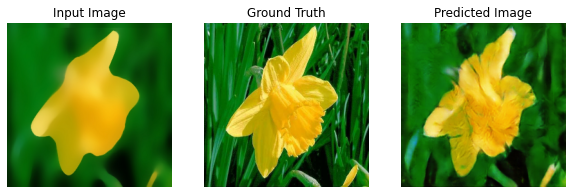

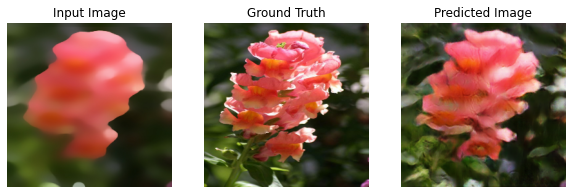

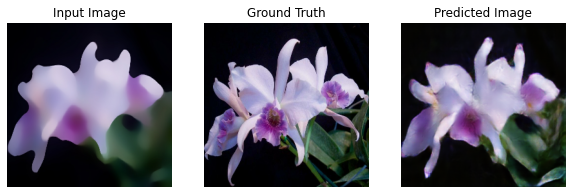

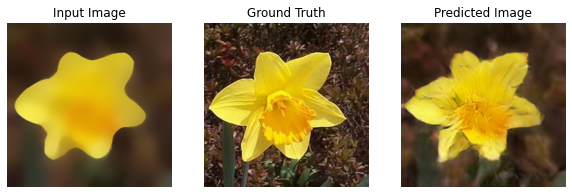

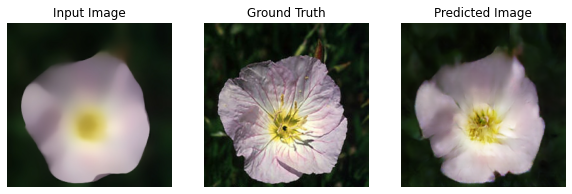

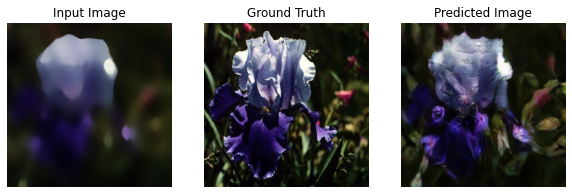

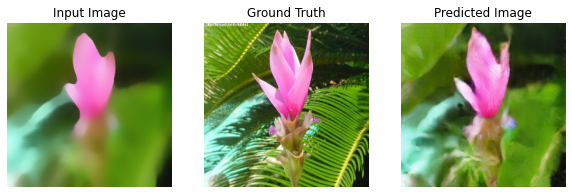

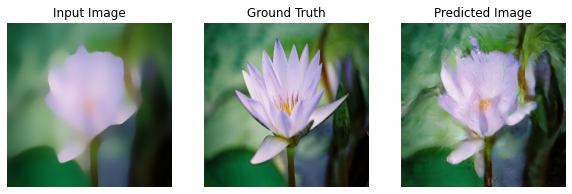

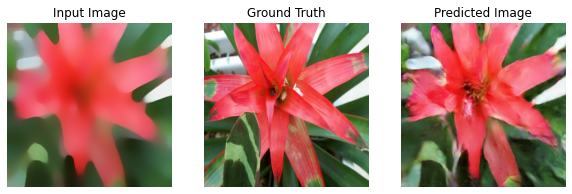

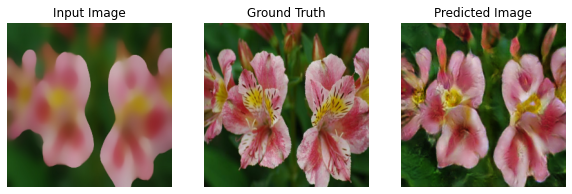

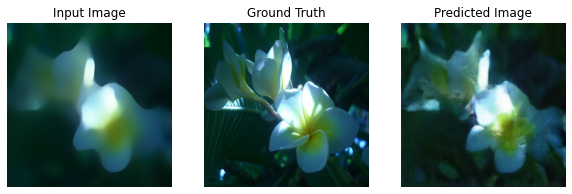

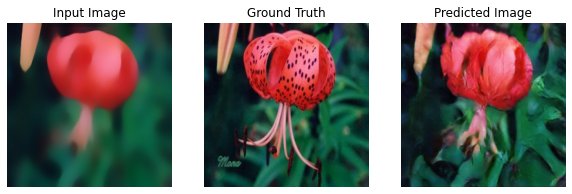

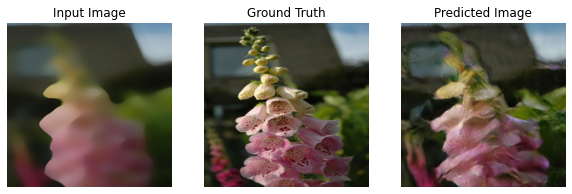

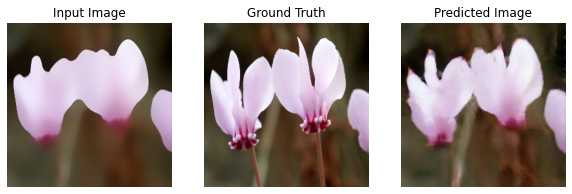

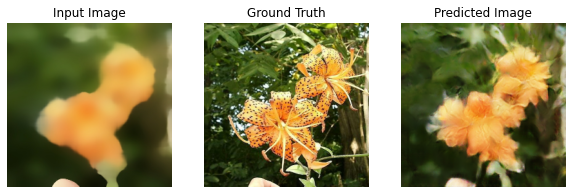

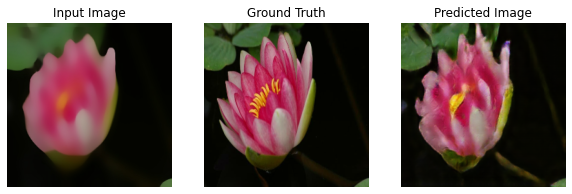

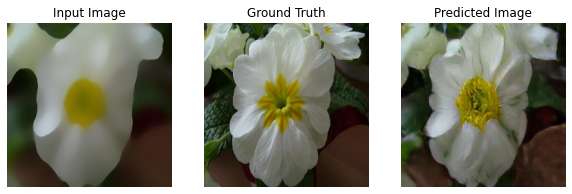

In [ ]:
# veamos como genera con test_dataset
ims2show = 20
for inp, tar in test_dataset.take(ims2show):
    generate_images(generador, inp, tar, display_imgs=True )

In [ ]:
# funcion para probar otras imagenes
def test_image_jpg(fileurl, saveFilename=False):
    test_image = tf.cast(tf.image.decode_jpeg(tf.io.read_file(fileurl)), tf.float32)[..., :3]
    
    test_image = tf.image.resize(test_image, [256, 256])
    test_image = (test_image / 127.5) -1
    test_image = tf.reshape(test_image,(1,test_image.shape[0],test_image.shape[1],test_image.shape[2]))
    
    print(test_image.shape)

    predicted_image = (generador((test_image), training=False)+1)/2
    plt.imshow(predicted_image[0, ...])
    
    if saveFilename:
        tf.keras.preprocessing.image.save_img(saveFilename, predicted_image[0, ...])
    
    return predicted_image[0, ...]

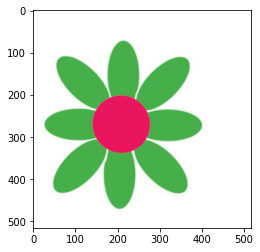

In [ ]:
# aquí pones la dirección de la imagen de referencia
test_img_name = "./test/input_test.jpg"
plt.imshow(tf.image.decode_jpeg(tf.io.read_file(test_img_name)))

(1, 256, 256, 3)


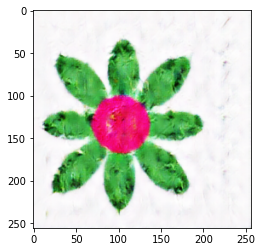

In [ ]:
# aquí se genera la imagen a partir de la imagen de referencia y se guarda
pred_im_test = test_image_jpg(test_img_name, "./output_test.jpg")